# Apache Spark

This note book is regarding analytical insights of baby names data past few years. The data set consists of names of babies grouped by male and female gender in a year wise files. Data set consist of three rows name, gender and count of the name.

Table of content: 1) Getting data 2) Loading data 3) Load visualization packages 4) analytics on the data 5) summary

Getting data:

Baby names data set is provided by the governament, you can get it from here - https://www.ssa.gov/oact/babynames/limits.html . They provide year by year csv files of names of babies, gender and count.

Loading data :

Uploading the data into spark is an easy task, goto data sources in spark analytics, click on add source option, choose upload option and choose the csv file to upload. This file is stored in the Object Storage instance that is associated with your IBM Analytics for Apache Spark service. When you load data into the data sources, you will find option of 'insert to code', by choosing this credentials to access the data file to this code will be added to the notebook.

Before you can access data in the data file in the Object Storage instance, you must set the Hadoop configuration with the Object Storage instance service credentials by using configuration functions.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SQLContext, Row

credentials_2011 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_af86c77f_c2e4_430c_9519_7ab4137c0500',
  'project_id':'f3d58e71946643a99e88cdc57d42fd61',
  'region':'dallas',
  'user_id':'081985e6e6c848edae2950c815d4b235',
  'domain_id':'15bbf0b07a6a48929e5421b7677ba62d',
  'domain_name':'1139161',
  'username':'admin_089cb5b4729d6478f9c7ce61067695c5eb12722d',
  'password':"""fT30&V[Kf.r?viSh""",
  'filename':'yob2011.csv',
  'container':'notebooks',
  'tenantId':'s016-dc95a8262cba15-1750885665e1'
}

credentials_2012 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_af86c77f_c2e4_430c_9519_7ab4137c0500',
  'project_id':'f3d58e71946643a99e88cdc57d42fd61',
  'region':'dallas',
  'user_id':'081985e6e6c848edae2950c815d4b235',
  'domain_id':'15bbf0b07a6a48929e5421b7677ba62d',
  'domain_name':'1139161',
  'username':'admin_089cb5b4729d6478f9c7ce61067695c5eb12722d',
  'password':"""fT30&V[Kf.r?viSh""",
  'filename':'yob2012.csv',
  'container':'notebooks',
  'tenantId':'s016-dc95a8262cba15-1750885665e1'
}

credentials_2013 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_af86c77f_c2e4_430c_9519_7ab4137c0500',
  'project_id':'f3d58e71946643a99e88cdc57d42fd61',
  'region':'dallas',
  'user_id':'081985e6e6c848edae2950c815d4b235',
  'domain_id':'15bbf0b07a6a48929e5421b7677ba62d',
  'domain_name':'1139161',
  'username':'admin_089cb5b4729d6478f9c7ce61067695c5eb12722d',
  'password':"""fT30&V[Kf.r?viSh""",
  'filename':'yob2013.csv',
  'container':'notebooks',
  'tenantId':'s016-dc95a8262cba15-1750885665e1'
}

credentials_2014 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_af86c77f_c2e4_430c_9519_7ab4137c0500',
  'project_id':'f3d58e71946643a99e88cdc57d42fd61',
  'region':'dallas',
  'user_id':'081985e6e6c848edae2950c815d4b235',
  'domain_id':'15bbf0b07a6a48929e5421b7677ba62d',
  'domain_name':'1139161',
  'username':'admin_089cb5b4729d6478f9c7ce61067695c5eb12722d',
  'password':"""fT30&V[Kf.r?viSh""",
  'filename':'yob2014.csv',
  'container':'notebooks',
  'tenantId':'s016-dc95a8262cba15-1750885665e1'
}

credentials_2015 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_af86c77f_c2e4_430c_9519_7ab4137c0500',
  'project_id':'f3d58e71946643a99e88cdc57d42fd61',
  'region':'dallas',
  'user_id':'081985e6e6c848edae2950c815d4b235',
  'domain_id':'15bbf0b07a6a48929e5421b7677ba62d',
  'domain_name':'1139161',
  'username':'admin_089cb5b4729d6478f9c7ce61067695c5eb12722d',
  'password':"""fT30&V[Kf.r?viSh""",
  'filename':'yob2015.csv',
  'container':'notebooks',
  'tenantId':'s016-dc95a8262cba15-1750885665e1'
}


def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credentials['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credentials['auth_url']+'/v3/auth/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credentials['project_id'])
    hconf.set(prefix + ".username", credentials['user_id'])
    hconf.set(prefix + ".password", credentials['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credentials['region'])
    hconf.setBoolean(prefix + ".public", True)

Configuring hadoop with object storage instance service. csv file are loaded into object storage.
Now we are connecting the object storage instance into hadoop to use the data.

In [2]:
#2015

credentials_2015['name'] = 'keystone2015'
set_hadoop_config(credentials_2015)

data2015 = sc.textFile("swift://notebooks.keystone2015/yob2015.csv")

dataParse2015 = data2015.map(lambda line : line.split(","))

dataPrecp2015 = dataParse2015.map(lambda x: Row(Name=x[0], Gender=x[1], Count=x[2], Year='2015'))
dataSchema2015 = sqlContext.createDataFrame(dataPrecp2015)
dataSchema2015.registerTempTable("list2015")
sqlContext.cacheTable("list2015")

# top 5 female names in 2015
print "TOP 5 FEMALE NAMES IN 2015"
DataFrame2015 = sqlContext.sql("Select Name, Count from list2015 where Gender='F' LIMIT 5")

DataFrame2015.show()

TOP 5 FEMALE NAMES IN 2015
+--------+-----+
|    Name|Count|
+--------+-----+
|    Emma|20355|
|  Olivia|19553|
|  Sophia|17327|
|     Ava|16286|
|Isabella|15504|
+--------+-----+



Creating spark data frames from csv file data.

In [3]:
#2014

credentials_2014['name'] = 'keystone2014'
set_hadoop_config(credentials_2014)

data2014 = sc.textFile("swift://notebooks.keystone2014/yob2014.csv")

dataParse2014 = data2014.map(lambda line : line.split(","))

dataPrecp2014 = dataParse2014.map(lambda x: Row(Name=x[0], Gender=x[1], Count=x[2], Year='2014'))
dataSchema2014 = sqlContext.createDataFrame(dataPrecp2014)
dataSchema2014.registerTempTable("list2014")
sqlContext.cacheTable("list2014")

#top 5 male names in 2014
print "TOP 5 MALE NAMES IN 2014"
DataFrame2014 = sqlContext.sql("Select Name, Count from list2014 where Gender='M' LIMIT 5")

DataFrame2014.show();

TOP 5 MALE NAMES IN 2014
+-------+-----+
|   Name|Count|
+-------+-----+
|   Noah|19229|
|   Liam|18421|
|  Mason|17157|
|  Jacob|16812|
|William|16776|
+-------+-----+



In [4]:
#2013

credentials_2013['name'] = 'keystone2013'
set_hadoop_config(credentials_2013)

data2013 = sc.textFile("swift://notebooks.keystone2013/yob2013.csv")

dataParse2013 = data2013.map(lambda line : line.split(","))

dataPrecp2013 = dataParse2013.map(lambda x: Row(Name=x[0], Gender=x[1], Count=x[2], Year='2013'))
dataSchema2013 = sqlContext.createDataFrame(dataPrecp2013)
dataSchema2013.registerTempTable("list2013")
sqlContext.cacheTable("list2013")

In [5]:
   
#2012

credentials_2012['name'] = 'keystone2012'
set_hadoop_config(credentials_2012)

data2012 = sc.textFile("swift://notebooks.keystone2012/yob2012.csv")

dataParse2012 = data2012.map(lambda line : line.split(","))

dataPrecp2012 = dataParse2012.map(lambda x: Row(Name=x[0], Gender=x[1], Count=x[2], Year='2012'))
dataSchema2012 = sqlContext.createDataFrame(dataPrecp2012)
dataSchema2012.registerTempTable("list2012")
sqlContext.cacheTable("list2012")

Plotting graph of most famous male baby names of 2011 year

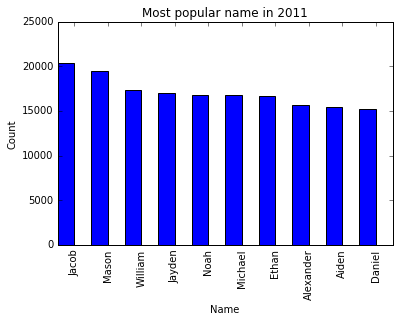

In [6]:
#2011

credentials_2011['name'] = 'keystone2011'
set_hadoop_config(credentials_2011)

data2011 = sc.textFile("swift://notebooks.keystone2011/yob2011.csv")

dataParse2011 = data2011.map(lambda line : line.split(","))

dataPrecp2011 = dataParse2011.map(lambda x: Row(Name=x[0], Gender=x[1], Count=x[2], Year='2011'))
dataSchema2011 = sqlContext.createDataFrame(dataPrecp2011)
dataSchema2011.registerTempTable("list2011")
sqlContext.cacheTable("list2011")

DataFrame2011 = sqlContext.sql("Select * from list2011 where Gender='M' LIMIT 10").collect()

xName=[]
yCount=[]
for row in DataFrame2011:
    xName.append(row.Name)
    yCount.append(row.Count)

N = 10
index = np.arange(N)  
bar_width = 0.5
plt.bar(index, yCount, bar_width, color='b')
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Most popular name in 2011')
plt.xticks(index + bar_width, xName, rotation=90)
plt.show()

Plotting graph for name Noah against count from 2011 to 2015

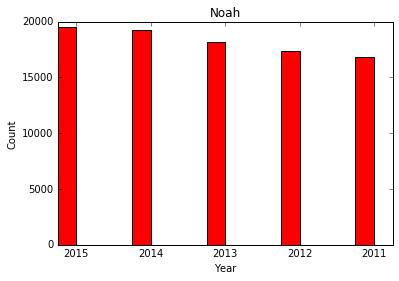

In [7]:
#Noah
DataFrame131415 = sqlContext.sql("Select * from list2015 where Name='Noah' and Gender='M' UNION ALL Select * from list2014 where Name='Noah' and Gender='M' UNION ALL Select * from list2013 where Name='Noah' and Gender='M' UNION ALL Select * from list2012 where Name='Noah' and Gender='M' UNION ALL Select * from list2011 where Name='Noah' and Gender='M'").collect()

xYear=[]
yCount=[]
for row in DataFrame131415:
    xYear.append(row.Year)
    yCount.append(row.Count)

N = 5
index = np.arange(N)  
bar_width = 0.25
plt.bar(index, yCount, bar_width, color='r')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Noah')
plt.xticks(index + bar_width, xYear)
plt.show()

Plotting graph to compare trend of name emma against name sophia in last 5 years

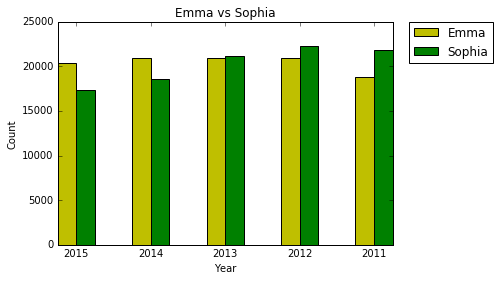

In [8]:
# Emma vs Sophia
DataFrame131415 = sqlContext.sql("Select * from list2015 where Name='Emma' and Gender='F' UNION ALL Select * from list2014 where Name='Emma' and Gender='F' UNION ALL Select * from list2013 where Name='Emma' and Gender='F' UNION ALL Select * from list2012 where Name='Emma' and Gender='F' UNION ALL Select * from list2011 where Name='Emma' and Gender='F'").collect()

xYear=[]
yCount1=[]
for row in DataFrame131415:
    xYear.append(row.Year)
    yCount1.append(row.Count)

DataFrame131415 = sqlContext.sql("Select * from list2015 where Name='Sophia' and Gender='F' UNION ALL Select * from list2014 where Name='Sophia' and Gender='F' UNION ALL Select * from list2013 where Name='Sophia' and Gender='F' UNION ALL Select * from list2012 where Name='Sophia' and Gender='F' UNION ALL Select * from list2011 where Name='Sophia' and Gender='F'").collect()

yCount2=[]
for row in DataFrame131415:
    yCount2.append(row.Count)    

N = 5
index = np.arange(N)  
bar_width = 0.25
plt.bar(index, yCount1, bar_width, color='y', label='Emma')
plt.bar(index+bar_width, yCount2, bar_width, color='g', label='Sophia')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Emma vs Sophia')
plt.xticks(index + bar_width , xYear)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
